In [763]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Data

In [764]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Exploring Data

In [765]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [766]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## correlations

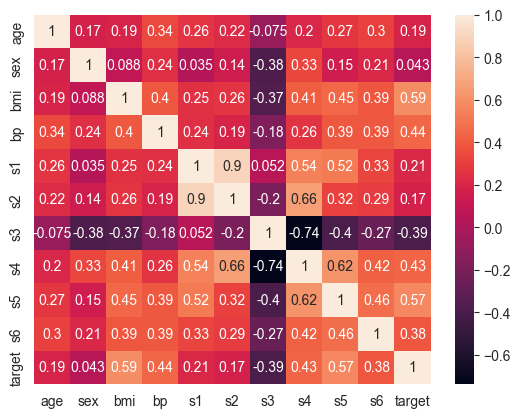

In [767]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Scaling Data

In [768]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Outliers

In [769]:
lof = LocalOutlierFactor(n_neighbors=15)
lof_idx = lof.fit_predict(X)

dbscan = DBSCAN(eps=2.5, min_samples=20)
scan_idx = dbscan.fit_predict(X)

common_outliers = np.where((lof_idx == -1) & (scan_idx == -1))
X = np.delete(X, common_outliers, axis=0)
y = np.delete(y, common_outliers)

# Training Model

In [770]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=128)

reg = LinearRegression()
reg.fit(train_X, train_y)

pred_train = reg.predict(train_X)
pred_test = reg.predict(test_X)

print('root mean squared error train: ', root_mean_squared_error(train_y, pred_train))
print('root mean squared error test: ', root_mean_squared_error(test_y, pred_test))
print('r2 score: ', r2_score(test_y, pred_test))

root mean squared error train:  53.42088837134404
root mean squared error test:  54.309545981918276
r2 score:  0.5141763570536406
